Using GP to get the equation and then applying BO

In [13]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression

In [ ]:
# Define the input and output data
x = np.array([13, 6.5, 6.5, 13, 13, 6.5, 6.5, 13, 13, 6.5, 6.5, 13]).reshape(-1, 1)
y = np.array([20.9, 27.4, 29.7, 34.2, 30.1, 29.6, 41.7, 21.8, 28.1, 42, 32.2, 53.8])

In [3]:
# Create a Gaussian process regression model with the RBF kernel
kernel = RBF(length_scale=1.0)
model = GaussianProcessRegressor(kernel=kernel)

In [4]:
# Fit the model to the data
model.fit(x, y)

GaussianProcessRegressor(kernel=RBF(length_scale=1))

In [6]:
# Generate new input data for prediction
x_new = np.linspace(0, 2, 100).reshape(-1, 1)

# Make predictions using the trained model
y_pred, y_std = model.predict(x_new, return_std=True)

In [16]:
# Fit a linear regression model to the predicted values
lin_model = LinearRegression()
lin_model.fit(x, y)

# Get the coefficients of the linear regression model
intercept = lin_model.intercept_
coefficients = lin_model.coef_


In [17]:
# Print the equation relating the input and output
equation = "y = {:.3f} + {:.3f} * x".format(intercept, coefficients[0])
print("Equation:", equation)

Equation: y = 36.050 + -0.351 * x


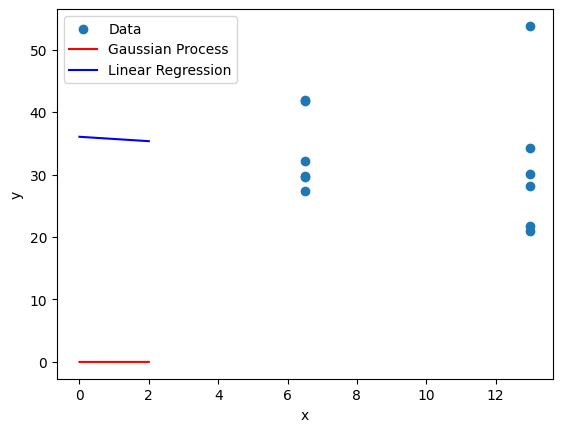

In [18]:
# Plot the input-output relationship
import matplotlib.pyplot as plt

plt.scatter(x, y, label='Data')
plt.plot(x_new, y_pred, color='red', label='Gaussian Process')
plt.plot(x_new, lin_model.predict(x_new), color='blue', label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()